In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from spectralETD import spectralETD

# Burges' equation in 1D

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$$

The Fourier transform of the dynamical equation is 

$$\frac{\partial \hat{u}_{k}}{\partial t} = - \mathcal{FT}\{u\frac{\partial u}{\partial x} \} -\nu k^2 \hat{u}_{k} $$

In [2]:
nu = 0.001

In [3]:
BE = spectralETD(ndim=1,method='ETD',device='cuda')

In [ ]:
L = 2*np.pi
Ngrid = 2048
BE.Set_Geometry(lengths=L,gridsize=Ngrid)
x = BE.x

In [5]:
# The linear terms of PDE
def Loperator_k(params):
    nu,K2 = params
    return -nu*K2

params = nu,BE.K2
BE.Set_LinearOperator(Loperator_k,params)

In [6]:
# The non-linear terms of PDE
def Noperator_k(n,params):
    K, fft = params
    return -0.5j*K*fft(n**2)

params = BE.Kx, BE.fft
BE.Set_NonLinearOperator(Noperator_k,params)

In [7]:
BE.Set_TimeStep(h=0.001)

In [8]:
# Frames to the output
dt = 1.0
T = 10.0
t = np.arange(0.0,T,dt)
Nsteps = t.size

In [ ]:
# Setting Initial condition
n0 = np.exp(-10*(x-0.5*L)**2)

BE.Set_Field(n0)

In [10]:
# time evolution loop
for i in tqdm(range(1,Nsteps)):
    n[i] = BE.Calculate_Dynamics(t[i-1],t[i])

100%|██████████| 9/9 [00:00<00:00, 19.85it/s]


## Generate a plot

(0.0, 1.1)

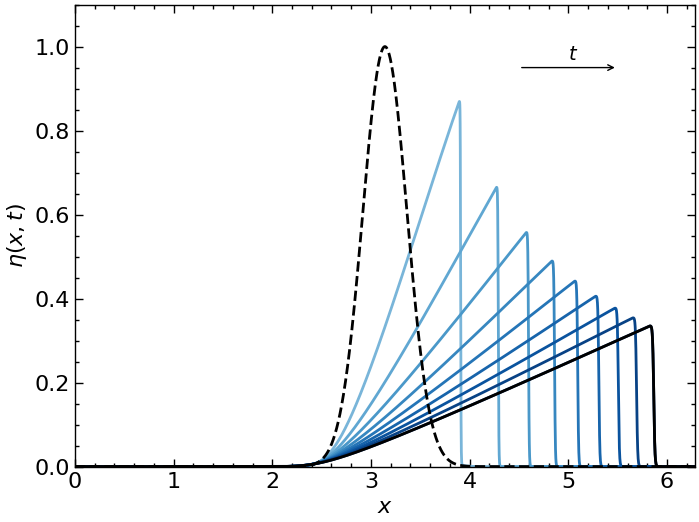

In [ ]:
fig, ax = plt.subplots(1,1)

my_map = plt.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,Nsteps))
plt.plot(x,n0,'--',color='k',zorder=5)
for i in range(1,Nsteps):
    plt.plot(x,n[i],'-',c=color[i])
plt.plot(x,n[-1],'-k')
plt.xlabel(r'$x$')
plt.ylabel(r'$\eta(x,t)$')
plt.annotate("", xy=(5.5, 0.95), xytext=(4.5, 0.95),
            arrowprops=dict(arrowstyle="->"))
plt.text(5,0.97,r"$t$",fontsize=14)
plt.xlim(0,2*np.pi)
plt.ylim(0.,1.1)
# fig.savefig('burgers.pdf')

## Generate a movie (MP4)

In [12]:
my_map = cm.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,Nsteps//100))
def animate(i):
    ax.clear()
    for j in range(i//100+1):
        ax.plot(x,n[100*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(-1.5,0.97,'$t={:.2f}$'.format(i*dt))
    # ax.set_xlim(-1,1)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= Nsteps,
                               interval = 50)
writervideo = animation.FFMpegWriter(fps=100) 
# ani.save('burgers.mp4',writer=writervideo,dpi=200)

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_155487/2165342582.py:12: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel('$\eta(x,t)$')
/tmp/ipykernel_155487/2165342582.py:12: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel('$\eta(x,t)$')


NameError: name 'cm' is not defined

## Generate a GIF

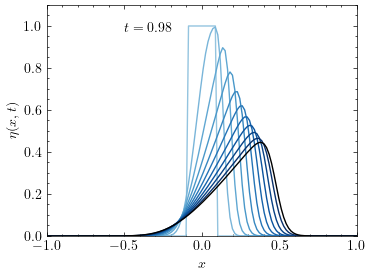

In [5]:
my_map = cm.get_cmap('Blues')
color = my_map(np.linspace(0.4,1.0,10))
def animate(i):
    ax.clear()
    for j in range(i//10+1):
        ax.plot(x,n[10*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(-0.5,0.97,'$t={:.2f}$'.format(i*dt))
    # ax.set_xlim(-1,1)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= 99,
                               interval = 50)
ani.save('burgers.gif',writer='pillow',fps=30,dpi=200)